# Calculating the Efficient Frontier of a Given ETF Portfolio

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [149]:
tickers = ['VWO', 'VEA', '1328.T', 'XESC.MI', 'MEUD.PA', 'SCHV', 'ITOT', 'SPY']

etf = pd.DataFrame()

for t in tickers:
    etf[t] = yf.download(t)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [150]:
etf.head()

,VWO,VEA,1328.T,XESC.MI,MEUD.PA,SCHV,ITOT,SPY
Date,,,,,,,,
2005-03-10,16.362793,NaN,NaN,NaN,NaN,NaN,19.358932,86.676430
2005-03-11,16.343224,NaN,NaN,NaN,NaN,NaN,19.286528,86.068794
2005-03-14,16.245358,NaN,NaN,NaN,NaN,NaN,19.358932,86.604935
2005-03-15,15.893052,NaN,NaN,NaN,NaN,NaN,19.262995,85.890022
2005-03-16,15.756037,NaN,NaN,NaN,NaN,NaN,19.091040,85.160812


Once the data is loaded and ready to go, we can first take a look at the join behavior of each one of the assets if they were normalized to 100. 

<AxesSubplot:xlabel='Date'>

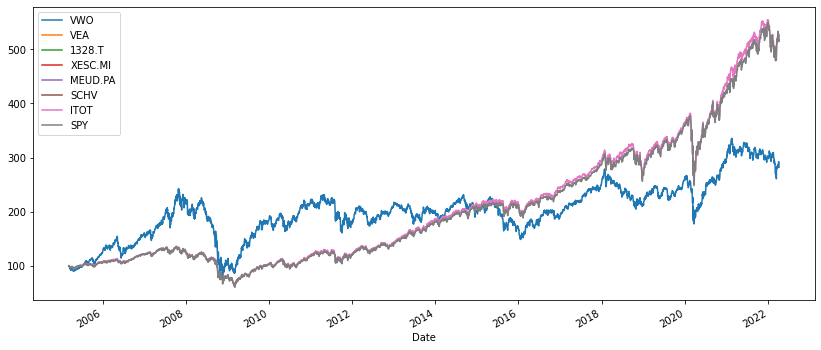

In [151]:
normalized = (etf / etf.iloc[0]) * 100
normalized.plot(figsize=(14, 6))

## Calculating the Weights, Returns, Variance, and Volatility of the Portfolio

In [152]:
etf_returns = np.log(etf/etf.shift())
etf_returns

,VWO,VEA,1328.T,XESC.MI,MEUD.PA,SCHV,ITOT,SPY
Date,,,,,,,,
2005-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-11,-0.001197,NaN,NaN,NaN,NaN,NaN,-0.003747,-0.007035
2005-03-14,-0.006006,NaN,NaN,NaN,NaN,NaN,0.003747,0.006210
2005-03-15,-0.021925,NaN,NaN,NaN,NaN,NaN,-0.004968,-0.008289
2005-03-16,-0.008658,NaN,NaN,NaN,NaN,NaN,-0.008967,-0.008526
...,...,...,...,...,...,...,...,...
2022-04-01,0.018897,0.008707,0.010605,0.003124,0.005321,0.003356,0.004251,0.002830
2022-04-04,0.017293,0.004325,-0.007058,0.007850,0.008104,-0.002096,0.008057,0.008530
2022-04-05,-0.017718,-0.011991,0.003367,-0.008014,0.002253,-0.007442,-0.014390,-0.012712


In [153]:
def get_weights(num_assets):
    num_assets = len(etf.columns)
    weights = np.random.random(num_assets)
    weights /= sum(weights)
    return weights


In [154]:
weights = get_weights(etf)

In [155]:
etf_cov = etf_returns.cov()
etf_cov

,VWO,VEA,1328.T,XESC.MI,MEUD.PA,SCHV,ITOT,SPY
VWO,0.000309,0.000228,2.342345e-06,0.000113,0.000074,1.123256e-04,1.799901e-04,1.804209e-04
VEA,0.000228,0.000206,1.351162e-06,0.000117,0.000079,1.112518e-04,1.655733e-04,1.666042e-04
1328.T,0.000002,0.000001,9.556756e-05,0.000007,0.000003,-2.786147e-08,1.550056e-07,9.048265e-08
XESC.MI,0.000113,0.000117,6.840662e-06,0.000183,0.000120,8.559348e-05,9.148539e-05,8.956942e-05
MEUD.PA,0.000074,0.000079,3.226037e-06,0.000120,0.000116,6.497237e-05,6.541432e-05,6.402786e-05
SCHV,0.000112,0.000111,-2.786147e-08,0.000086,0.000065,1.123426e-04,1.117956e-04,1.101000e-04
ITOT,0.000180,0.000166,1.550056e-07,0.000091,0.000065,1.117956e-04,1.502224e-04,1.480038e-04
SPY,0.000180,0.000167,9.048265e-08,0.000090,0.000064,1.101000e-04,1.480038e-04,1.496278e-04


In [182]:
etf_pfolio_returns = np.sum(weights * etf_returns.mean())*250
etf_pfolio_variance = np.dot(weights.T, np.dot(weights, etf_cov*250))
etf_pfolio_volatility = np.sqrt(etf_pfolio_variance)

## Simulating all Possible Combinations to Obtain the Efficient Frontier and Optimal Weights given Sharpe Ratio

In [183]:
sim_weights = []
sim_returns= []
sim_vol = []

for sim in range(9000):
    weights = get_weights(etf)
    sim_weights.append(weights)
    sim_returns.append(np.sum(weights * etf_returns.mean())*250)
    sim_vol.append(np.sqrt(np.dot(weights.T, np.dot(weights, etf_cov*250))))

In [184]:
sim_returns = np.array(sim_returns) 
sim_vol = np.array(sim_vol)

In [185]:
etf_pfolio_returns_volatility = pd.DataFrame({'Returns': sim_returns, 'Volatility': sim_vol})
etf_pfolio_returns_volatility
#sr= etf_pfolio_returns_volatility['Returns'] / etf_pfolio_returns_volatility['Volatility']

,Returns,Volatility
0,0.075698,0.154144
1,0.073639,0.178361
2,0.074022,0.173632
3,0.071486,0.120543
4,0.079185,0.158139
...,...,...
8995,0.068639,0.171601
8996,0.077462,0.154481
8997,0.069186,0.161063
8998,0.067828,0.159917


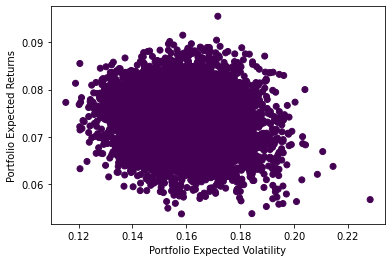

In [186]:
plt.scatter(etf_pfolio_returns_volatility['Volatility'], etf_pfolio_returns_volatility['Returns'], c = sr)
plt.xlabel('Portfolio Expected Volatility')
plt.ylabel('Portfolio Expected Returns')
plt.show()

In [187]:
for i in sim_weights[np.argmax(sr)]:
    print(i)

0.14516322932259845
0.11581508258954723
0.1935003094813191
0.04986810102654834
0.04576523345179648
0.15846087407171341
0.14359141573942372
0.14783575431705318
